In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats

In [12]:
df = pd.read_csv(r"dados\\cinemaTicket_Ref.csv")
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


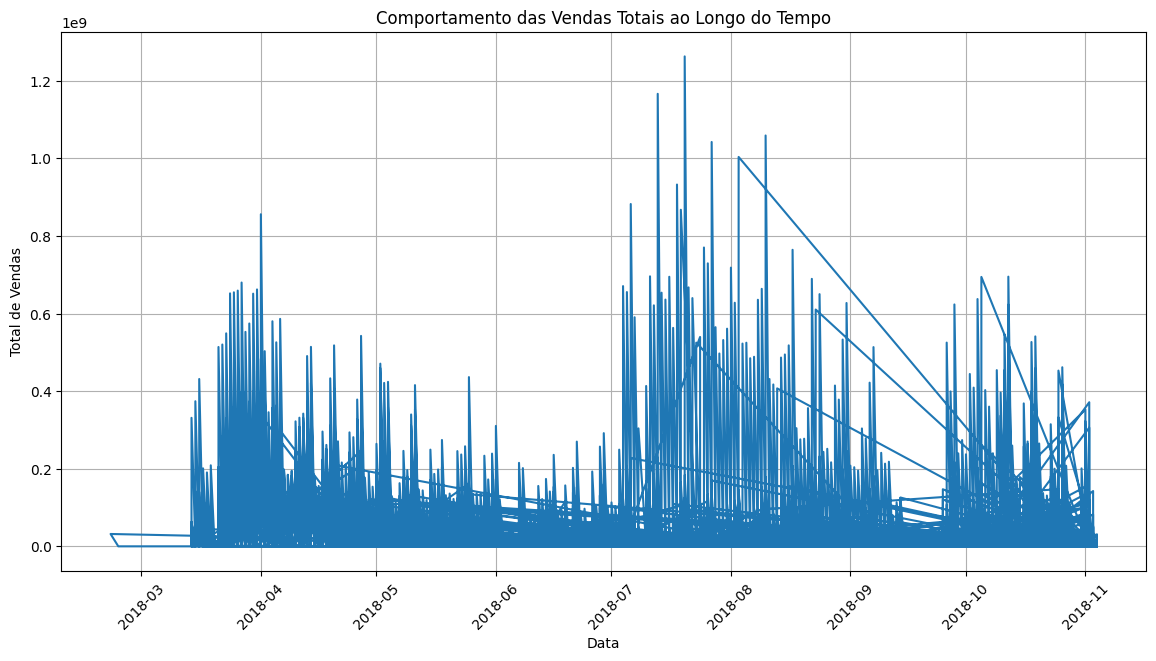

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['total_sales'])
plt.title('Comportamento das Vendas Totais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid()
plt.show()

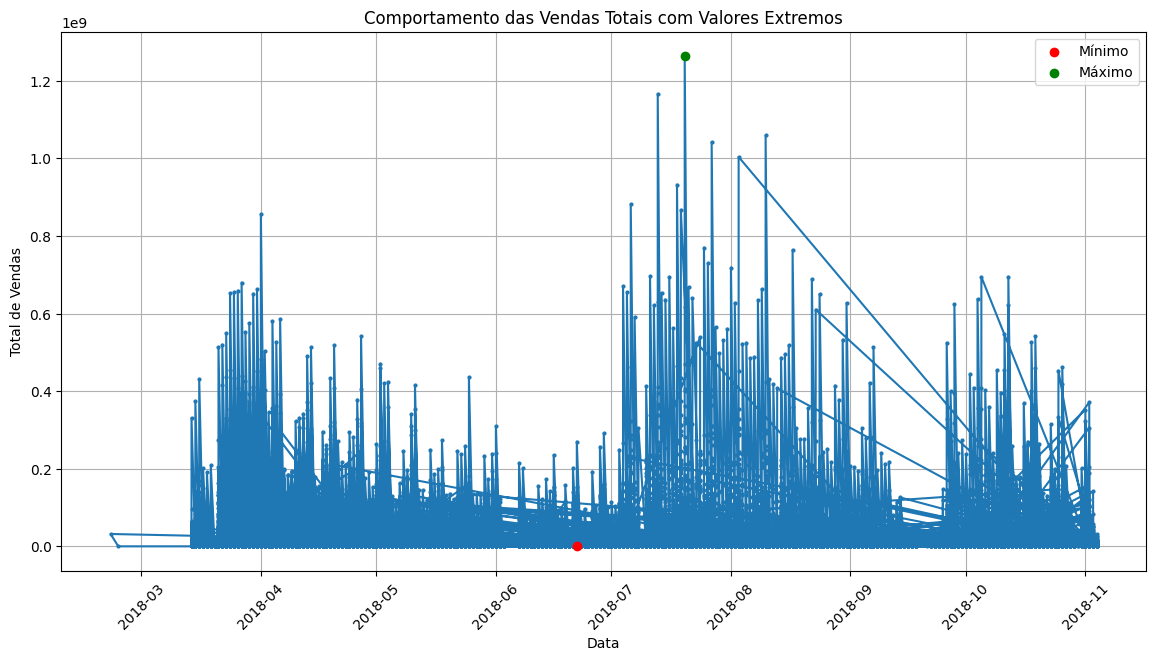

In [14]:
# Identificando mínimos e máximos
min_value = df['total_sales'].min()
max_value = df['total_sales'].max()

# Encontrar as datas correspondentes
min_date = df.loc[df['total_sales'] == min_value, 'date'].values[0]
max_date = df.loc[df['total_sales'] == max_value, 'date'].values[0]

# Plotando com os valores extremos
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['total_sales'], marker='o', linestyle='-', markersize=2)
plt.scatter(min_date, min_value, color='red', label='Mínimo', zorder=5)
plt.scatter(max_date, max_value, color='green', label='Máximo', zorder=5)
plt.title('Comportamento das Vendas Totais com Valores Extremos')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


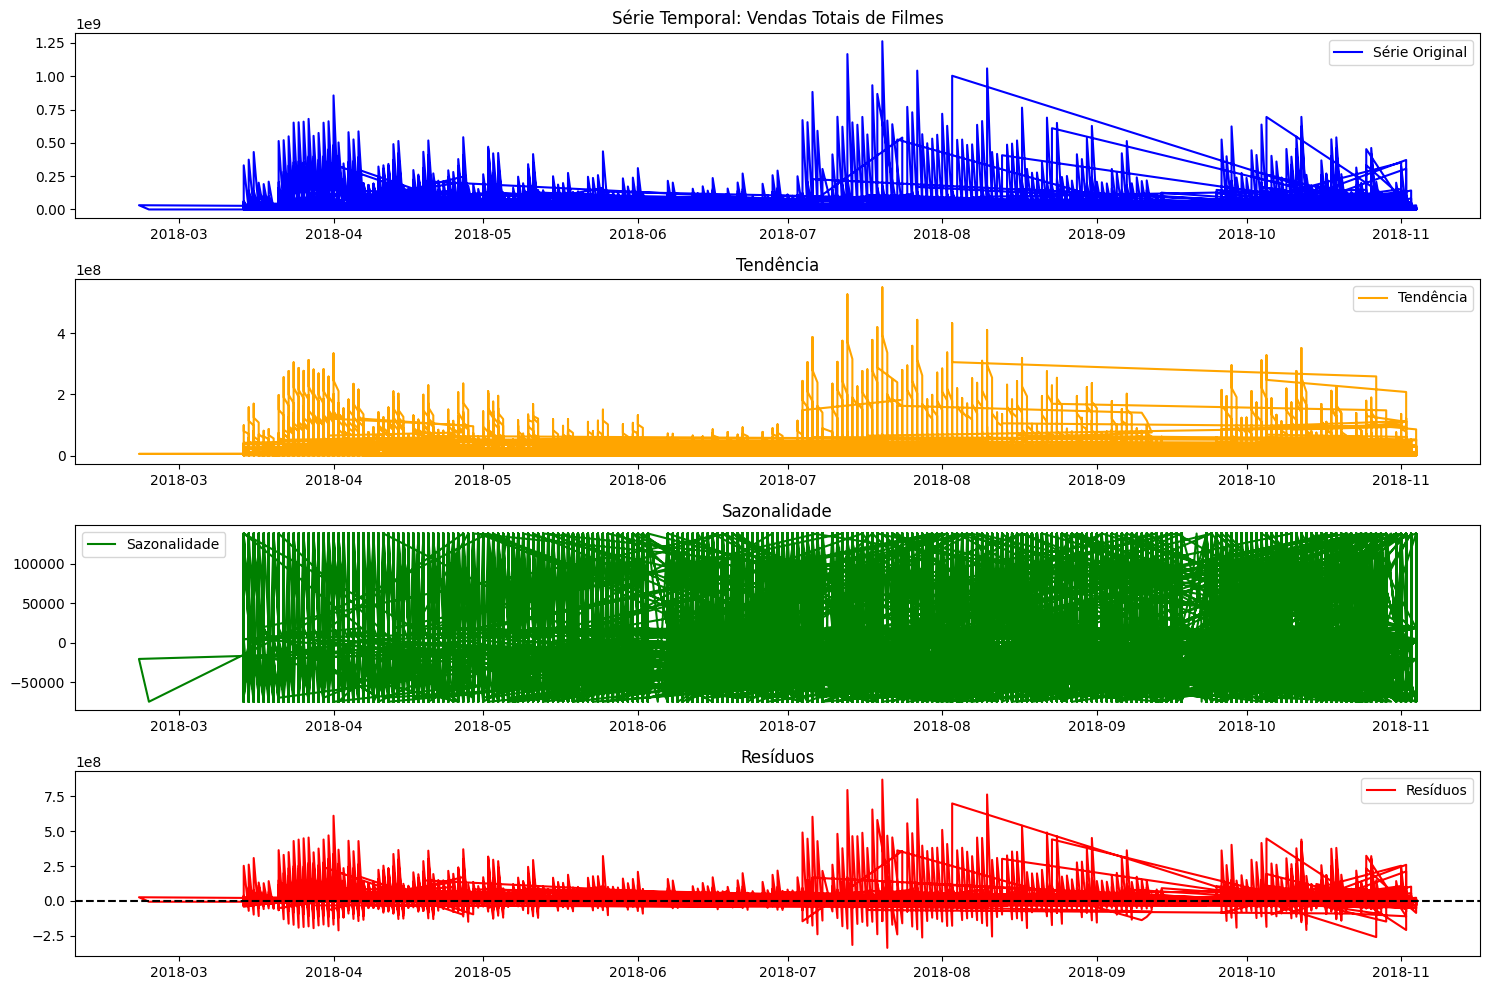

In [24]:

# Decomposição
decomposition = seasonal_decompose(df['total_sales'], model='additive', period=7)  # Ajuste o período conforme necessário


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
observed = decomposition.observed


# Criando subplots para os componentes
plt.figure(figsize=(15, 10))

# Gráfico da série original
plt.subplot(4, 1, 1)
plt.plot(observed, label='Série Original', color='blue')
plt.title('Série Temporal: Vendas Totais de Filmes')
plt.legend()

# Gráfico da tendência
plt.subplot(4, 1, 2)
plt.plot(trend, label='Tendência', color='orange')
plt.title('Tendência')
plt.legend()

# Gráfico da sazonalidade
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')
plt.legend()

# Gráfico dos resíduos
plt.subplot(4, 1, 4)
plt.plot(residual, label='Resíduos', color='red')
plt.title('Resíduos')
plt.axhline(0, color='black', linestyle='--')  # Linha horizontal em zero
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()

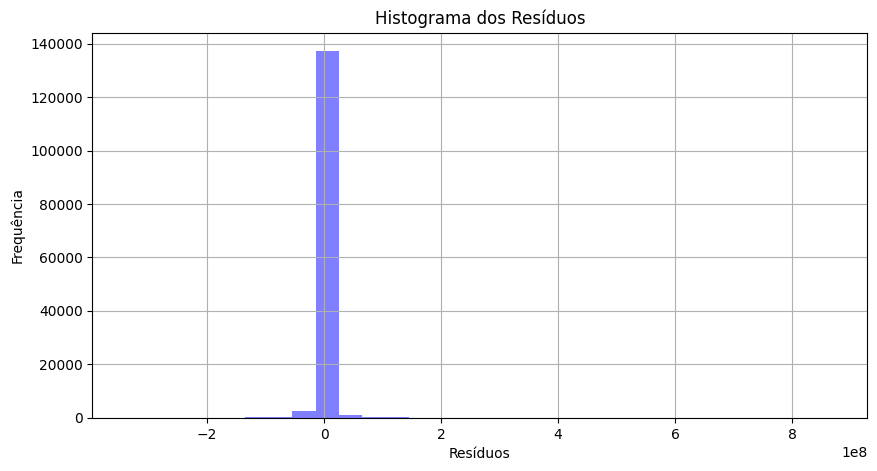

Estatística do teste de Shapiro: 0.17913452478079694, Valor p: 1.9127829891890447e-187


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 142393.
  res = hypotest_fun_out(*samples, **kwds)


In [21]:

# Obtendo resíduos
residuals = decomposition.resid.dropna()

# Histograma dos resíduos
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, alpha=0.5, color='blue')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid()
plt.show()

# Teste de normalidade
shapiro_test = stats.shapiro(residuals)
print(f'Estatística do teste de Shapiro: {shapiro_test.statistic}, Valor p: {shapiro_test.pvalue}')
